In [1]:
import MKSReader
import SRSReader
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from datetime import datetime, timedelta
import struct


plt.style.use('~/evanstyle.mplstyle')

In [ ]:
#if instead you are using this notebook far away from the class. 
#import sys 
#sys.path.add("/path/to/RGA-Analysis/")
#import RGA-Analysis.SRSReader as SRSReader
#import RGA-Analysis.MKSReader as MKSReader

# For MKS rga

In [3]:
infiles = ["pre-recovery.txt", "during-recovery-1150.txt", "halfway-to-overnight.txt"]
d = MKSReader.MKSReader(infiles)
d.load_data()

Could not find file : pre-recovery.txt


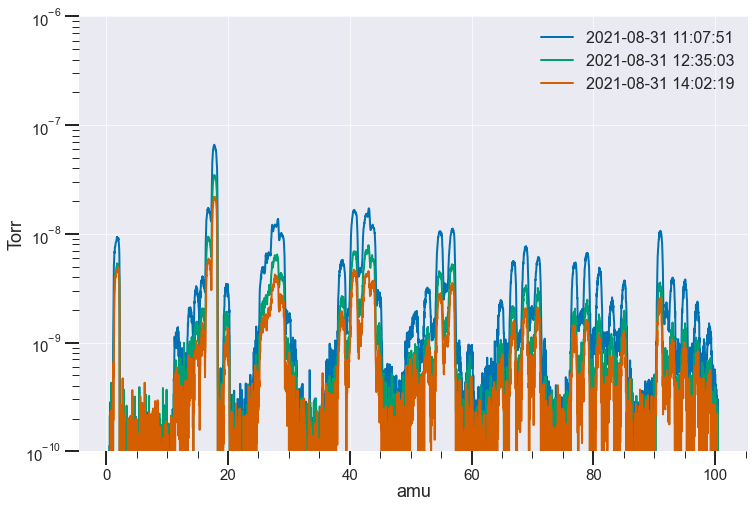

In [105]:
ax = d.plot_scan_by_index(0)
d.plot_scan_by_index(80, ax=ax)
d.plot_scan_by_index(180, ax=ax)
plt.show()

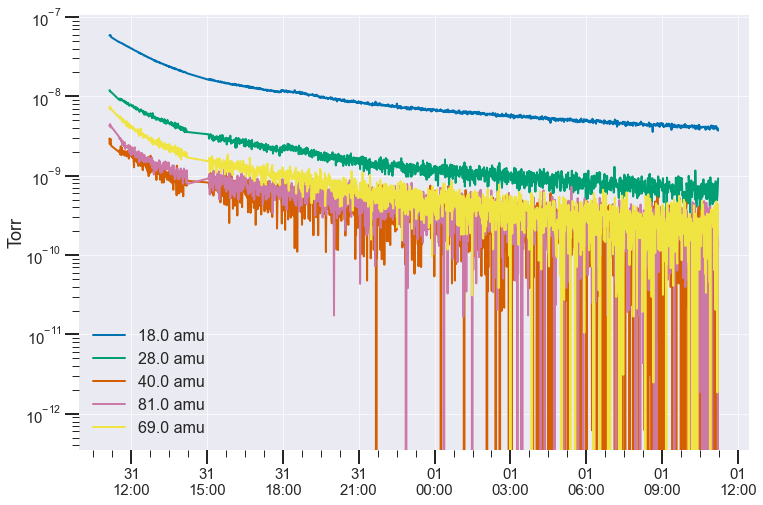

In [75]:
import matplotlib.dates as mdates
ax = d.plot_mass_evolution_simple(18)
d.plot_mass_evolution_simple(28, ax=ax)
d.plot_mass_evolution_simple(40, ax=ax)
d.plot_mass_evolution_simple(81, ax=ax)
d.plot_mass_evolution_simple(69, ax=ax)
#format time axis labels    
frmt = "%d\n%H:%M"
ax.xaxis.set_major_formatter(mdates.DateFormatter(frmt))
ax.xaxis_date()
ax.legend()
plt.show()

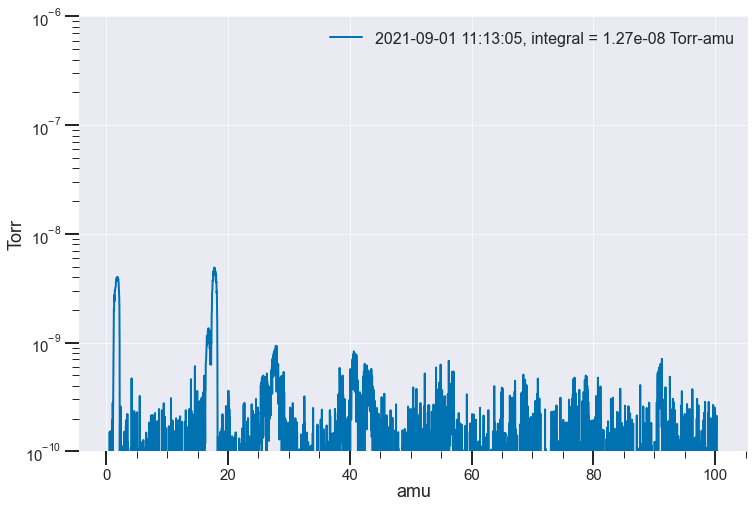

In [115]:
d.plot_scan_by_index(-1)
plt.show()

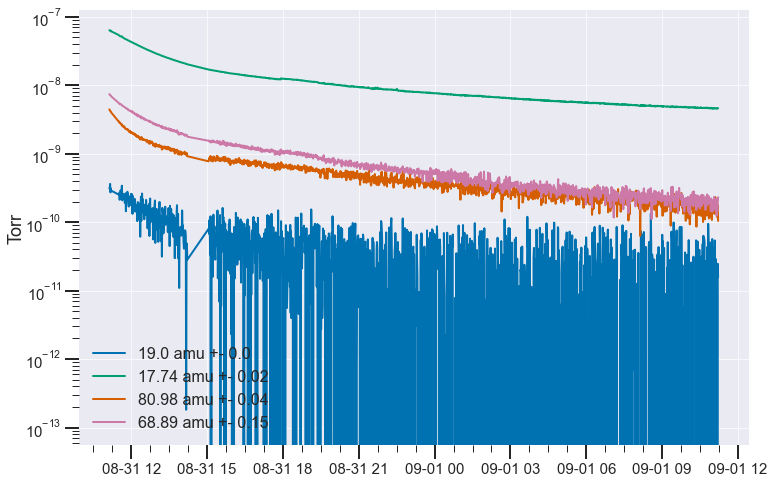

In [126]:
#ax = d.plot_mass_evolution_simple(18)
#ax =d.plot_mass_evolution_simple(28)
#d.plot_mass_evolution_simple(40, ax=ax)
#d.plot_mass_evolution_simple(81, ax=ax)
#d.plot_mass_evolution_simple(69, ax=ax)
ax = d.plot_mass_evolution_peakfound(19, window=1)
d.plot_mass_evolution_peakfound(18, ax=ax, window=1)
#d.plot_mass_evolution_peakfound(28, ax=ax)
#d.plot_mass_evolution_peakfound(40, ax=ax)
d.plot_mass_evolution_peakfound(81, ax=ax, window=2)
d.plot_mass_evolution_peakfound(69, ax=ax)
ax.legend()
plt.show()


# For SRS RGA

In [7]:
infile = "../../Logbook/LS-bake-smalltpc/bake_scans.ana"
s = SRSReader.SRSReader(infile, points_per_amu = 20, min_mass = 1)
s.load_data()

opening data file: ../../Logbook/LS-bake-smalltpc/bake_scans.ana
Indexing scans
Grabbing pressures from each scan
Done loading data


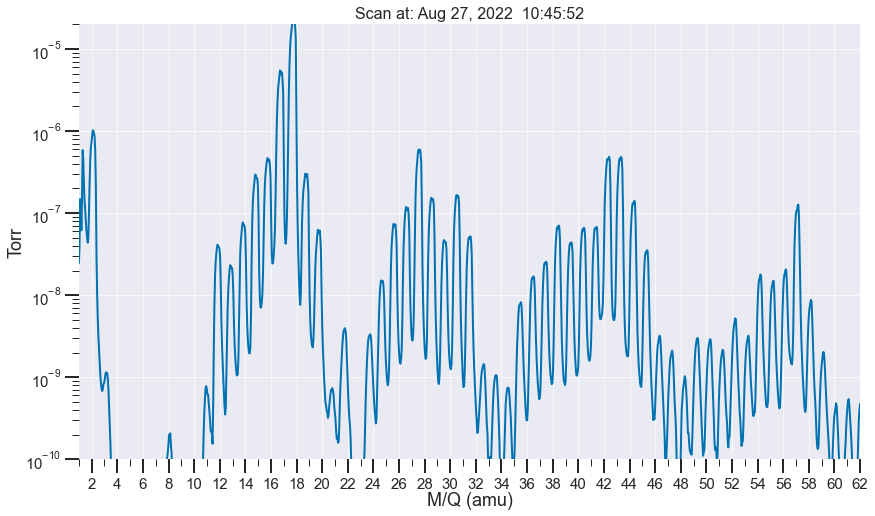

In [8]:
s.plot_scan(0)
plt.show()

17.9 amu: 2.64e-04 e^(-(x - 416.61)/47.83)/47.83
12.0 amu: 7.70e-07 e^(-(x - 604.57)/70.65)/70.65
43.7 amu: 8.12e-06 e^(-(x - 575.00)/67.20)/67.20
27.8 amu: 6.28e-06 e^(-(x - 516.73)/59.82)/59.82
2.1 amu: 1.09e-05 e^(-(x - 557.46)/64.93)/64.93
57.7 amu: 1.69e-06 e^(-(x - 434.92)/51.37)/51.37
31.8 amu: 7.24e-07 e^(-(x - 377.96)/43.72)/43.72


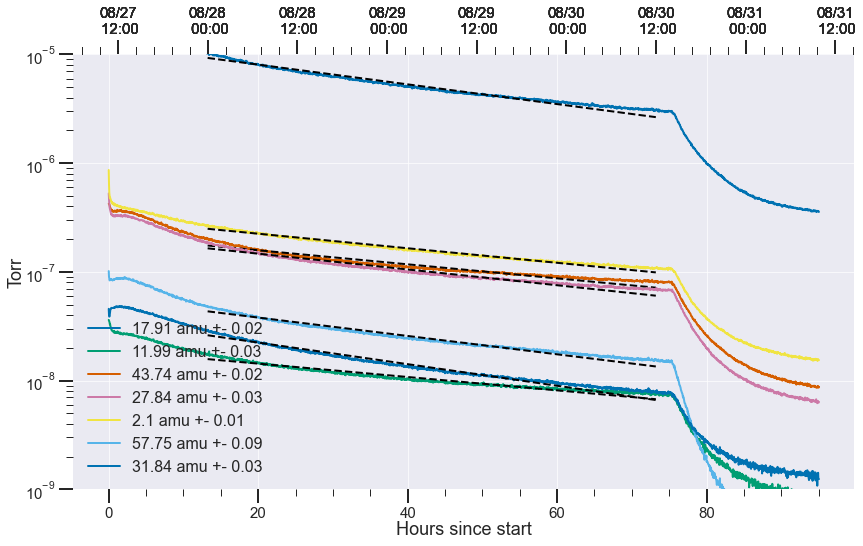

In [67]:
fitmin = datetime(2022, 8, 28, 0, 0, 0)
fitmax = datetime(2022, 8, 30, 12, 0, 0)
ax = s.plot_mass_evolution_peakfound(18, fit=True, mintime=fitmin, maxtime=fitmax)
s.plot_mass_evolution_peakfound(12, ax=ax, fit=True, mintime=fitmin, maxtime=fitmax)
s.plot_mass_evolution_peakfound(44, ax=ax, fit=True, mintime=fitmin, maxtime=fitmax)
s.plot_mass_evolution_peakfound(28, ax=ax, fit=True, mintime=fitmin, maxtime=fitmax)
s.plot_mass_evolution_peakfound(2, ax=ax, fit=True, mintime=fitmin, maxtime=fitmax)
s.plot_mass_evolution_peakfound(58, ax=ax, fit=True, mintime=fitmin, maxtime=fitmax)
s.plot_mass_evolution_peakfound(32, ax=ax, fit=True, mintime=fitmin, maxtime=fitmax)
ax.legend(loc="lower left")
ax.set_ylim([1e-9, 1e-5])
plt.show()

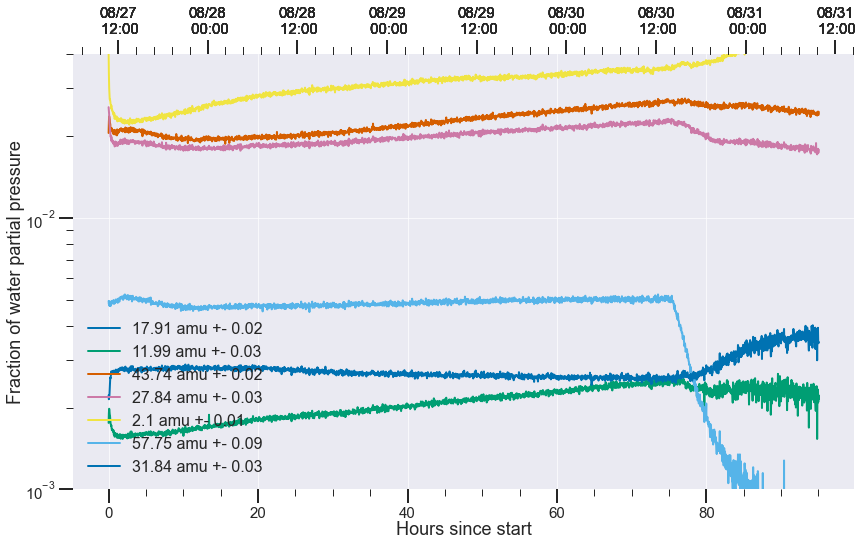

In [47]:
ax = s.plot_mass_evolution_peakfound_relative(18,18)
s.plot_mass_evolution_peakfound_relative(12,18, ax=ax)
s.plot_mass_evolution_peakfound_relative(44,18, ax=ax)
s.plot_mass_evolution_peakfound_relative(28,18, ax=ax)
s.plot_mass_evolution_peakfound_relative(2, 18,ax=ax)
s.plot_mass_evolution_peakfound_relative(58,18, ax=ax)
s.plot_mass_evolution_peakfound_relative(32,18, ax=ax)
ax.legend(loc="lower left")
ax.set_ylim([1e-3, 4e-2])
ax.set_ylabel("Fraction of water partial pressure")
plt.show()